#Handwritten Text

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5, ))])
train_dataset = torchvision.datasets.MNIST(root = './data', transform=transform, train = True, download = True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 64, shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 134887099.87it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 28650826.35it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34770870.63it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2516582.40it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



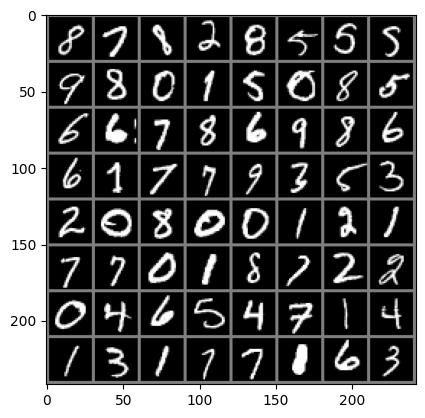

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 +0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

datasiter = iter(train_loader)
images, labels = next(datasiter)

imshow(torchvision.utils.make_grid(images))

#Setting the NN

In [ ]:
import torch.nn as nn

class SimpleNN(nn.Module):
  def __init__(self, input_size = 28*28, num_classes = 10):
    super(SimpleNN, self).__init__()
    self.fc = nn.Linear(input_size, num_classes)

  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = self.fc(x)
    return x

## Training the NN

In [ ]:
import torch.optim as optim

model = SimpleNN()
criterion = nn.CrossEntropyLoss() #loss function penalizes output we have at moment vs. expected
optimizer = optim.Adam(model.parameters(), lr = 0.001)

epochs = 10

for epoch in range(epochs):
  total = 0
  for images, labels in train_loader:
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Updating
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total += loss.item()
  print(f'Epoch [{epoch+1}/{epochs}], loss: {total / len(train_loader): .4f}')

print("Finished Training!")


Epoch [1/10], loss:  0.4625
Epoch [2/10], loss:  0.3272
Epoch [3/10], loss:  0.3073
Epoch [4/10], loss:  0.3001
Epoch [5/10], loss:  0.2933
Epoch [6/10], loss:  0.2920
Epoch [7/10], loss:  0.2864
Epoch [8/10], loss:  0.2834
Epoch [9/10], loss:  0.2821
Epoch [10/10], loss:  0.2796
Finished Training!


In [ ]:
test_dataset = torchvision.datasets.MNIST(root = './data', transform=transform, train = False, download = True)
test_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 64, shuffle = False)

def get_accuracy(model, dataloader):
  model.eval()
  correct = 0
  total = 0

  with torch.no_grad():
    for images, labels in dataloader:
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  return (correct / total) * 100

test_accuracy = get_accuracy(model, test_loader)
print(f'Test accuracy: {test_accuracy:.2f}')

Test accuracy: 92.86
